In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 


## Exploratary Data Analysis

In [ ]:
df = pd.read_csv('train.tsv',sep='\t')

In [ ]:
df.shape

(7395, 27)

In [ ]:
df.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7385,7386,7387,7388,7389,7390,7391,7392,7393,7394
url,http://www.bloomberg.com/news/2010-12-23/ibm-p...,http://www.popsci.com/technology/article/2012-...,http://www.menshealth.com/health/flu-fighting-...,http://www.dumblittleman.com/2007/12/10-foolpr...,http://bleacherreport.com/articles/1205138-the...,http://www.conveniencemedical.com/genital-herp...,http://gofashionlane.blogspot.tw/2012/06/ameri...,http://www.insidershealth.com/article/racing_f...,http://www.valetmag.com/the-handbook/features/...,http://www.howsweeteats.com/2010/03/24/cookies...,...,http://shopmarkethq.com/collections/brands-min...,http://slice.seriouseats.com/archives/2010/06/...,http://achicdirection.com/2012/01/23/vintage-f...,http://www.villagevoice.com/bestof/2009/award/...,http://www.worth1000.com/emailthis.asp?entry=5...,http://techcrunch.com/2010/09/08/kno-raises-46...,http://www.uncoached.com/category/why-i-miss-c...,http://eatthis.menshealth.com/slide/sweet-pota...,http://naturallyella.com/,http://sportsillustrated.cnn.com/2011_swimsuit...
urlid,4042,8471,1164,6684,9006,7018,8685,3402,477,6731,...,5419,546,10382,7634,8923,8958,8895,1191,5612,90
boilerplate,"{""title"":""IBM Sees Holographic Calls Air Breat...","{""title"":""The Fully Electronic Futuristic Star...","{""title"":""Fruits that Fight the Flu fruits tha...","{""title"":""10 Foolproof Tips for Better Sleep ""...","{""title"":""The 50 Coolest Jerseys You Didn t Kn...","{""url"":""conveniencemedical genital herpes home...","{""title"":""fashion lane American Wild Child "",""...","{""url"":""insidershealth article racing for reco...","{""title"":""Valet The Handbook 31 Days 31 days"",...","{""url"":""howsweeteats 2010 03 24 cookies and cr...",...,"{""url"":""shopmarkethq collections brands minkpi...","{""title"":""How to Make No Knead Pizza Dough No ...","{""title"":""Vintage Funk A Chic Direction "",""bod...","{""url"":""villagevoice bestof 2009 award best pl...","{""title"":""Gummy Snake Worth1000 Contests "",""bo...","{""title"":""Kno Raises 46 Million More To Build ...","{""title"":""Why I Miss College "",""body"":""Mar 30 ...","{""title"":""Sweet Potatoes Eat This Not That i'...","{""title"":""Naturally Ella "",""body"":"" "",""url"":""n...","{""title"":""Esti Ginzburg Swimsuit by Letarte by..."
alchemy_category,business,recreation,health,health,sports,?,arts_entertainment,?,?,?,...,?,culture_politics,arts_entertainment,recreation,?,computer_internet,culture_politics,recreation,arts_entertainment,?
alchemy_category_score,0.789131,0.574147,0.996526,0.801248,0.719157,?,0.22111,?,?,?,...,?,0.832741,0.31693,0.679419,?,0.651067,0.14192,0.196273,0.617876,?
avglinksize,2.055556,3.677966,2.382883,1.543103,2.676471,119.000000,0.773810,1.883333,0.471503,2.410112,...,1.939394,3.156863,1.753731,1.995098,1.000000,3.010526,2.208054,2.000000,1.026316,1.158209
commonlinkratio_1,0.676471,0.508021,0.562016,0.400000,0.500000,0.745455,0.215054,0.719697,0.190722,0.469325,...,0.459732,0.669565,0.510791,0.539535,0.358974,0.474747,0.483333,0.315789,0.210526,0.505917
commonlinkratio_2,0.205882,0.288770,0.321705,0.100000,0.222222,0.581818,0.053763,0.265152,0.036082,0.101227,...,0.255034,0.313043,0.251799,0.213953,0.068376,0.222222,0.246667,0.171053,0.052632,0.428994
commonlinkratio_3,0.047059,0.213904,0.120155,0.016667,0.123457,0.290909,0.043011,0.113636,0.000000,0.018405,...,0.140940,0.113043,0.043165,0.018605,0.025641,0.191919,0.036667,0.105263,0.000000,0.023669
commonlinkratio_4,0.023529,0.144385,0.042636,0.000000,0.043210,0.018182,0.043011,0.015152,0.000000,0.003067,...,0.080537,0.034783,0.000000,0.018605,0.017094,0.191919,0.026667,0.052632,0.000000,0.000000


In [ ]:
df.alchemy_category.value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

<AxesSubplot:xlabel='alchemy_category'>

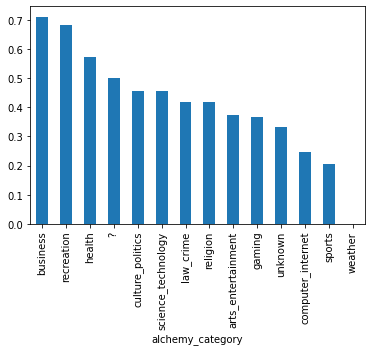

In [ ]:
df.groupby('alchemy_category').label.mean().sort_values(ascending=False).plot.bar()

We notice that 70% of  business articles are evergreen urls. People tend to re-read business articles.
We are based on claculating the mean which not always give the reality. We have to check mean relatively to the number of articles first.

In [ ]:
df.groupby('alchemy_category').label.agg(['mean','count']).sort_values('count',ascending=False)

,mean,count
alchemy_category,,
?,0.502135,2342
recreation,0.684296,1229
arts_entertainment,0.371945,941
business,0.711364,880
health,0.573123,506
sports,0.205263,380
culture_politics,0.457726,343
computer_internet,0.246622,296
science_technology,0.456747,289


After seeing the mean relatvely to the total number of articles per each category we can assume that the feature 'Alchemy_Category' is an important one for predicting our target variable.

<AxesSubplot:>

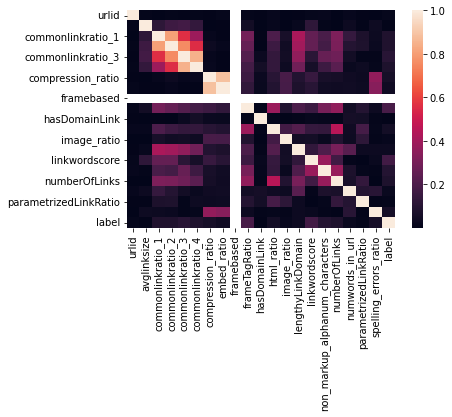

In [ ]:
sns.heatmap(df.corr().abs())

The feature framebased is correleted with all other features. Seems weird. Let's check what represent this column.
The url id has no correlation with other features since it is just an id of each url and not a value or  a category.


In [ ]:
del df['urlid']

In [ ]:
df.framebased.value_counts()

0    7395
Name: framebased, dtype: int64

The column has only 0 in values so that's why there correletion. And that doesn't mean that the feature is related to all other features. 

In [ ]:
del df['framebased']

<AxesSubplot:>

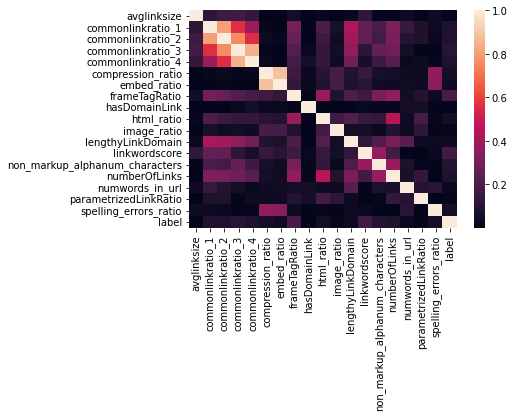

In [ ]:
sns.heatmap(df.corr().abs())

Now that we have seen the correlation between features. Let's see the correletion only between all features and the target variable.

<AxesSubplot:>

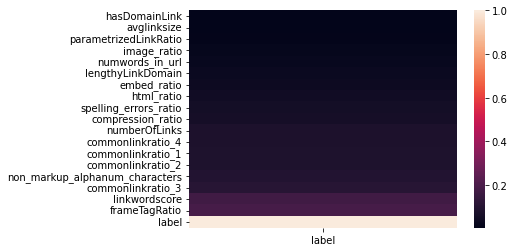

In [ ]:
sns.heatmap(df.corr().abs()[['label']].sort_values('label'))

<AxesSubplot:xlabel='label', ylabel='frameTagRatio'>

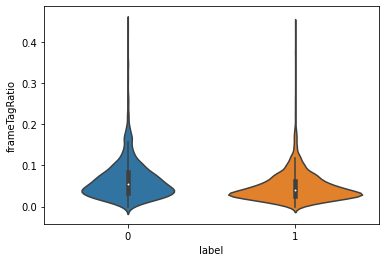

In [ ]:
sns.violinplot(x='label',y='frameTagRatio',data=df)

<AxesSubplot:xlabel='label', ylabel='linkwordscore'>

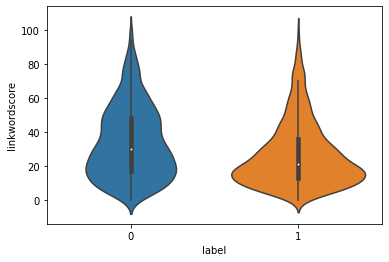

In [ ]:
sns.violinplot(x='label',y='linkwordscore',data=df)

In [ ]:

features = df.drop('label',axis = 1)
num_features = features.select_dtypes(np.number)

In [ ]:
num_features.columns

Index(['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio'],
      dtype='object')

In [ ]:
num_features.describe()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.056423,0.021231,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221
std,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,0.144162,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.028502,0.000000,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739
50%,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.045775,0.000000,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312
75%,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.073459,0.000000,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376
max,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.444444,1.000000,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

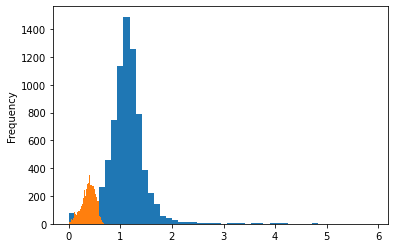

In [ ]:
num_features.avglinksize.apply(np.log1p).plot.hist(bins=50)
num_features.commonlinkratio_1.apply(np.log1p).plot.hist(bins=50)

In [ ]:
cat_features = features.select_dtypes(include=[np.object])
cat_features.sample(6)

C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,url,boilerplate,alchemy_category,alchemy_category_score,is_news,news_front_page
2375,http://www.nimh.nih.gov/about/director/2011/ne...,"{""title"":""NIMH New Findings Reveal New Worlds ...",?,?,?,0
7017,http://www.livestrong.com/slideshow/550744-the...,"{""title"":""The 20 Most Overrated Supplements Sl...",science_technology,0.799833,?,0
2272,http://scoopertino.com/,"{""title"":""Scoopertino Unreal Apple news "",""bod...",business,0.523264,1,1
4001,http://www.gmushrooms.com/OliveOil/,"{""title"":""Gourmet Finishing Oils Exquisite Fla...",business,0.847048,?,0
2248,http://www.preparedpantry.com/Recipes/Make-Ups...,"{""title"":""Easy Upside Down Cake How to Make Up...",recreation,0.544111,?,0
3405,http://www.ehow.com/how_4662492_ice-cream-less...,"{""title"":""How to make Homemade Ice Cream in le...",business,0.57966,1,0


<AxesSubplot:ylabel='Frequency'>

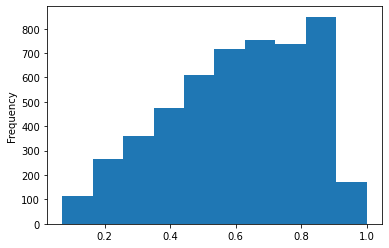

In [ ]:
cat_features[cat_features.alchemy_category_score!='?'].alchemy_category_score.astype(float).plot.hist()

In [ ]:
del df['alchemy_category_score']

In [ ]:
df.is_news.value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

In [ ]:
df.is_news= df.is_news.str.replace('?','0').astype(int) 

C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df.news_front_page.value_counts()

0    5853
?    1248
1     294
Name: news_front_page, dtype: int64

In [ ]:
df.boilerplate.iloc[1]

'{"title":"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races","body":"And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a trigger and the race starts Boom What people don t consider When a conventional gun goes off the sound travels to the ears of the closest runner a fraction of a second sooner than the others That s just enough to matter and why the latest starting pistol has traded in the mechanical boom for orchestrated electronic noise Omega has been the watch company tasked as the official timekeeper of the Olympic Games since 1932 At the 2010 Vancouv

The two categories variables url and boireplate represent a strong feature because we can find very important information that could improve our prediction. These leads us to use NLP since we are dealing with text data. At this stage we will choose just alchemy_category and news_front_page as our categorical variables.

In [ ]:
cat_features=cat_features[['alchemy_category','news_front_page']] 
cat_features.head()

,alchemy_category,news_front_page
0,business,0
1,recreation,0
2,health,0
3,health,0
4,sports,0


In [ ]:
encoding = pd.get_dummies(cat_features)
encoding.head()

,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
features = df.drop('label',axis = 1)
num_features = features.select_dtypes(np.number)
type(num_features)

pandas.core.frame.DataFrame

### Modeling 


In [ ]:
features = pd.concat([num_features,encoding],axis=1)
target = df['label']
type(num_features)

pandas.core.frame.DataFrame

In [ ]:
#normalization 
features = (features-features.mean())/features.std()
features.describe()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,...,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
count,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,...,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03,7.395000e+03
mean,-4.900295e-17,1.133794e-16,-4.323789e-17,1.018493e-16,7.926947e-18,4.996379e-17,-1.345179e-17,1.671865e-16,-2.642316e-18,3.535899e-16,...,-1.056926e-17,1.249095e-17,3.362947e-17,-4.804211e-17,2.594274e-17,4.804211e-18,1.825600e-17,1.287528e-16,7.974989e-17,-1.321158e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.204048e-01,-2.305040e+00,-1.458879e+00,-9.592006e-01,-6.782737e-01,-3.953330e-01,-2.923712e+00,-1.361367e+00,-1.472689e-01,-3.585945e+00,...,-6.487757e-02,-4.464212e-01,-9.914992e-02,-2.016541e-01,-2.327280e-01,-2.849400e-02,-2.326211e-02,-1.948129e+00,-2.034626e-01,-4.505535e-01
25%,-1.345463e-01,-6.294418e-01,-7.415478e-01,-7.276666e-01,-6.782737e-01,-3.177398e-01,3.384508e-01,-6.736693e-01,-1.472689e-01,-6.233391e-01,...,-6.487757e-02,-4.464212e-01,-9.914992e-02,-2.016541e-01,-2.327280e-01,-2.849400e-02,-2.326211e-02,5.132436e-01,-2.034626e-01,-4.505535e-01
50%,-7.814433e-02,6.523304e-02,-7.922666e-02,-2.441691e-01,-3.723036e-01,-3.105411e-01,3.384508e-01,-2.569172e-01,-1.472689e-01,-6.123100e-02,...,-6.487757e-02,-4.464212e-01,-9.914992e-02,-2.016541e-01,-2.327280e-01,-2.849400e-02,-2.326211e-02,5.132436e-01,-2.034626e-01,-4.505535e-01
75%,-1.558880e-02,7.304242e-01,5.855149e-01,4.300035e-01,2.175798e-01,-2.939664e-01,3.384508e-01,4.110391e-01,-1.472689e-01,5.142554e-01,...,-6.487757e-02,-4.464212e-01,-9.914992e-02,-2.016541e-01,-2.327280e-01,-2.849400e-02,-2.326211e-02,5.132436e-01,-2.034626e-01,-4.505535e-01
max,4.179198e+01,2.617834e+00,5.355767e+00,9.255536e+00,1.282041e+01,3.286092e+00,1.153992e+00,9.362184e+00,6.789380e+00,9.204354e+00,...,1.541156e+01,2.239734e+00,1.008437e+01,4.958317e+00,4.296281e+00,3.509036e+01,4.298256e+01,5.132436e-01,4.914244e+00,2.219192e+00


In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test , Y_train , Y_test = train_test_split(features,target,test_size=0.20)



In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier 

baseline = DummyClassifier(strategy='most_frequent')

lg_model = LogisticRegression(penalty='none')

lg_CV = LogisticRegressionCV() 

random_forest = RandomForestClassifier()

In [ ]:
baseline.fit(X_train,Y_train)
lg_model.fit(X_train,Y_train) 
lg_CV.fit(X_train,Y_train)
random_forest.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
baseline_preds = baseline.predict(X_test)
lg_preds = lg_model.predict(X_test)
lg_CV_preds = lg_CV.predict(X_test)
random_forest_preds=random_forest.predict(X_test)



In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(Y_test,baseline_preds))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       742
           1       0.50      1.00      0.67       737

    accuracy                           0.50      1479
   macro avg       0.25      0.50      0.33      1479
weighted avg       0.25      0.50      0.33      1479



C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
print(classification_report(Y_test,lg_preds))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       742
           1       0.64      0.74      0.69       737

    accuracy                           0.66      1479
   macro avg       0.66      0.66      0.66      1479
weighted avg       0.66      0.66      0.66      1479



In [ ]:
print(classification_report(Y_test,lg_CV_preds))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       742
           1       0.64      0.74      0.69       737

    accuracy                           0.66      1479
   macro avg       0.66      0.66      0.66      1479
weighted avg       0.66      0.66      0.66      1479



In [ ]:
print(classification_report(Y_test,random_forest_preds))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       742
           1       0.69      0.70      0.70       737

    accuracy                           0.70      1479
   macro avg       0.70      0.70      0.70      1479
weighted avg       0.70      0.70      0.70      1479



Index(['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'is_news', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'alchemy_category_?',
       'alchemy_category_arts_entertainment', 'alchemy_category_business',
       'alchemy_category_computer_internet',
       'alchemy_category_culture_politics', 'alchemy_category_gaming',
       'alchemy_category_health', 'alchemy_category_law_crime',
       'alchemy_category_recreation', 'alchemy_category_religion',
       'alchemy_category_science_technology', 'alchemy_category_sports',
       'alchemy_category_unknown', 'alchemy_category_weather',
       'news_front_page_0', 'news_front_page_1', 'news_front_page_?'],
      dtype='object')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.svm import LinearSVC 
knn = KNeighborsClassifier(n_neighbors=2)
lsvc = LinearSVC() 
sgd = SGDClassifier(random_state=0)

modelV = VotingClassifier([('LGCV',lg_CV),('RF',random_forest),
('knn',knn),('svc',lsvc),('sgf',sgd)],voting='hard')
for model in (lg_CV,random_forest,knn,lsvc,sgd,modelV):
    model.fit(X_train,Y_train) 
    print(model.__class__.__name__,model.score(X_test,Y_test))



LogisticRegressionCV 0.6599053414469236
RandomForestClassifier 0.6997971602434077
KNeighborsClassifier 0.6139283299526708


C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC 0.6612576064908722
SGDClassifier 0.6470588235294118


C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier 0.6646382691007438


In [ ]:
from sklearn.ensemble import BaggingClassifier 

bgg = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100) 

bgg.fit(X_train,Y_train)

print(bgg.score(X_test,Y_test)) 

0.6646382691007438


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 

GD = GradientBoostingClassifier(n_estimators=100,learning_rate=0.2)

GD.fit(X_train,Y_train)

print(GD.score(X_test,Y_test)) 

0.6991210277214334


In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
GD = AdaBoostClassifier(n_estimators=100)

GD.fit(X_train,Y_train)

print(GD.score(X_test,Y_test))

0.6910074374577417


In [ ]:
from sklearn.ensemble import StackingClassifier 
modeST = StackingClassifier([('LGCV',lg_CV),('RF',random_forest),('svc',lsvc),('sgf',sgd)],final_estimator=KNeighborsClassifier())

modeST.fit(X_train,Y_train)

print(modeST.score(X_test,Y_test))


C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packag

0.6734279918864098


## Submission in Kaggle

In [ ]:
test_df = pd.read_csv("test.tsv",sep='\t') 
test = test_df.copy() 
del test['framebased']
del test['urlid']
del test['alchemy_category_score']
test_df.is_news= test_df.is_news.str.replace('?','0').astype(int) 
features_df = preprocessor.fit_transform(df.drop('label', axis=1))


test_features = preprocessor.transform(test_df[df.drop('label', axis=1).columns])
predictions = GD.predict(test_features)
features_df.shape


C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


(7395, 36)

In [ ]:
# More robust way to do feature pre-processing.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

features_df = df.drop('label', axis=1)
FEATURE_COLUMNS = features_df.columns
NUM_FEATURES = features_df.select_dtypes(include=[np.number]).columns
CAT_FEATURES = ['alchemy_category', 'news_front_page']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
  transformers=[
      ('num', numeric_transformer, NUM_FEATURES),
      ('cat', categorical_transformer, CAT_FEATURES)
  ])

In [ ]:
sub_df = pd.DataFrame({'urlid' : test_df.urlid, 'label': predictions})
sub_df.head()

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,0


In [ ]:
sub_df.to_csv('mysubmission.csv', index=False) 

After submitting the csv file on Kaggle I get 0.66 as a score the first competitor had 0.88. Let's see if the NLP method can improve our score. 

## Could we improve the score by Text Feature that we ignore previously 


In [ ]:
test_df = pd.read_csv(r"C:\Users\dell\Downloads\train.tsv~\test.tsv",sep='\t') 
train_df = pd.read_csv(r"C:\Users\dell\Downloads\train.tsv~\train.tsv",sep='\t')  
lentrain= len(train_df)


In [ ]:
L=[train_df.boilerplate, test_df.boilerplate]
for elt in L :
    elt.replace(to_replace=r'"title":', value="",inplace=True,regex=True)
    elt.replace(to_replace=r'"url":',value="",inplace=True,regex=True) 
    elt.replace(to_replace=r'{|}',value="",inplace=True,regex=True) 
    elt = elt.str.lower()
    elt.to_list()


In [ ]:
text_data = list(L[0])+ list(L[1])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , ENGLISH_STOP_WORDS , TfidfVectorizer
from sklearn.model_selection import GridSearchCV , cross_val_score 
from sklearn.linear_model import LogisticRegression 

vect = TfidfVectorizer(stop_words='english', min_df=3,strip_accents='unicode',token_pattern=r'\w{1,}',
ngram_range=(1,3),use_idf=True, smooth_idf=True, sublinear_tf=True) 

vect.fit(text_data)
X= vect.transform(text_data)


In [ ]:
x_train = X[:lentrain] 
x_test = X[lentrain:] 
y_train = train_df.label.values

In [ ]:
lr = LogisticRegression(penalty='l2',C=1,max_iter=10000,dual=False) 
lr.fit(x_train,y_train)
lr_preds = lr.predict(x_test)
print(classification_report(lr_preds,y_test))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       819
           1       0.76      0.85      0.80       660

    accuracy                           0.81      1479
   macro avg       0.81      0.82      0.81      1479
weighted avg       0.82      0.81      0.81      1479



In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train,y_train) 
rd_preds = random_forest_model.predict(x_test)
print(random_forest_model.score(x_test,y_test))
print(classification_report(rd_preds,y_test))

0.795131845841785
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       796
           1       0.76      0.82      0.79       683

    accuracy                           0.80      1479
   macro avg       0.80      0.80      0.79      1479
weighted avg       0.80      0.80      0.80      1479



In [ ]:
from sklearn.svm import LinearSVC 

svc = LinearSVC() 

svc.fit(x_train,y_train) 

svc_preds = svc.predict(x_test)

print(classification_report(svc_preds,y_test))

print(svc.score(x_test,y_test)) 

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       773
           1       0.77      0.81      0.79       706

    accuracy                           0.79      1479
   macro avg       0.79      0.80      0.79      1479
weighted avg       0.80      0.79      0.79      1479

0.7944557133198107


In [ ]:
lr = LogisticRegression(penalty='l2',C=1,max_iter=10000,dual=False) 
lr.fit(x_train,y_train)
lr_preds = lr.predict(x_test) 

#submission in kaggle and we will see if the score is improved using text 

urlidlist= test_df.urlid.values 

submission = pd.DataFrame({"urlid": urlidlist,"label":lr_preds}) 

submission.to_csv('My_submission.csv',index=False)



 we get 0.80757 using text features that are powerful to prediction 
we went from 0.66876 to 0.80757 by using only the text feature 
 we believe that the score will be more improved if we could using both text features and some of features we used in our first analysis

some key solution observed is to use the most relevant features like alchemy category , and the text matrixes we get by thevectorizer and doing a PCA to reduce a dimension for example 